<a href="https://colab.research.google.com/github/AlbertP54/RNN/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("maintenance.csv")

df.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)
df.head()

Saving maintenance.csv to maintenance.csv


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


**Codificando variables independientes**

In [2]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
df.iloc[:, 0] = labelencoder_X_1.fit_transform(df.iloc[:, 0])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


**Calculando correlacion entre las columnas**

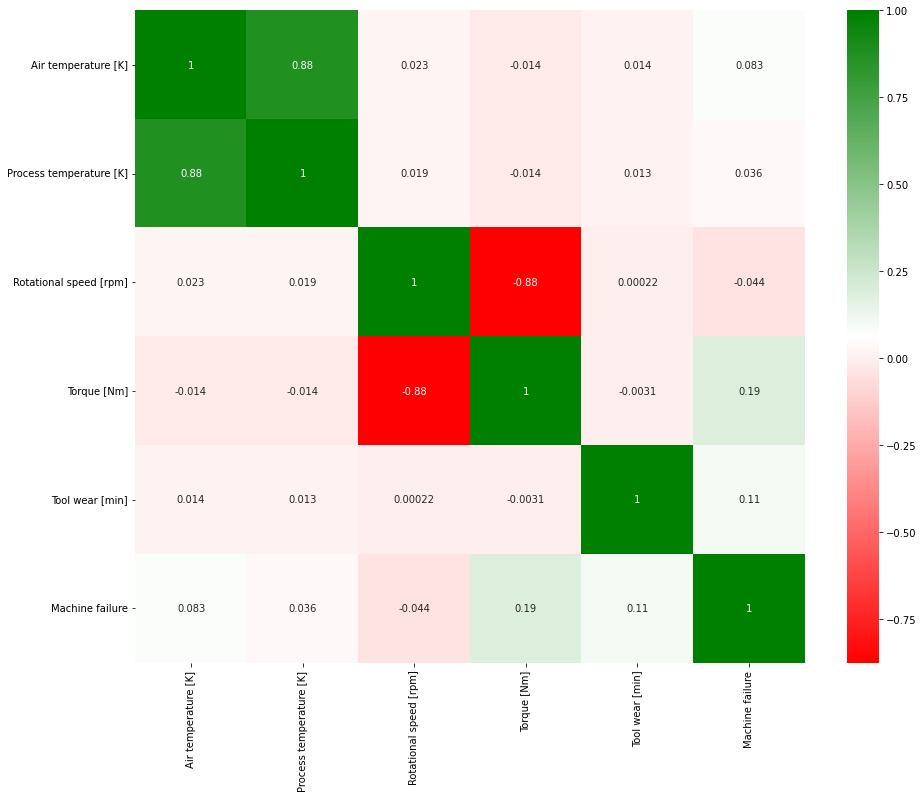

In [3]:
from matplotlib.colors import LinearSegmentedColormap

corr = df.iloc[:, 1:7].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','white','green'])

fig, ax = plt.subplots(figsize=(15,12)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap=cmap, annot=True,
           ax=ax)

**Creando copia del data set eliminando las siguientes columnas**

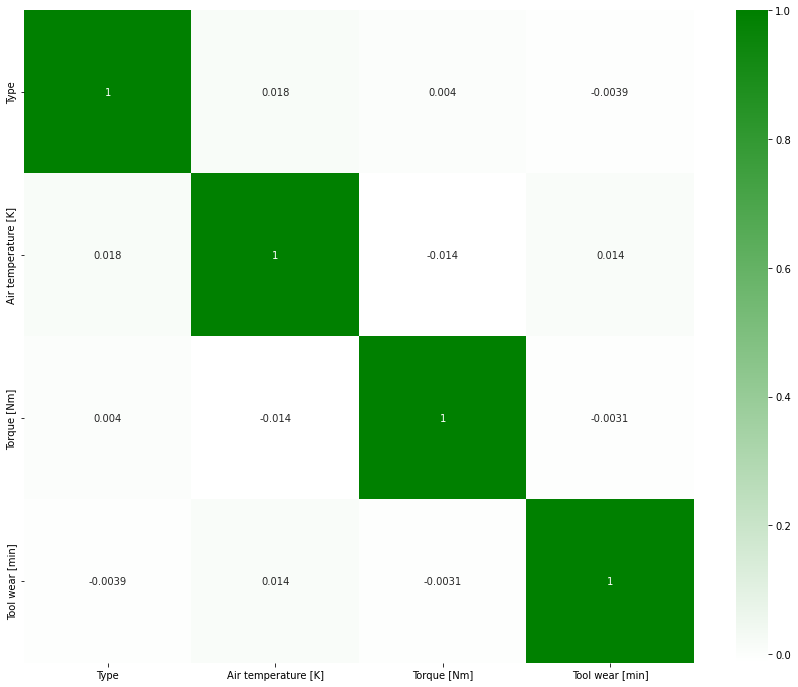

In [4]:
df2 = df.drop(['Process temperature [K]', 'Rotational speed [rpm]'], axis=1)

corr = df2.iloc[:, 0:4].corr()

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['white','green'])

fig, ax = plt.subplots(figsize=(15,12)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           cmap=cmap, annot=True,
           ax=ax)

In [5]:
df2

,Type,Air temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,42.8,0,0
1,1,298.2,46.3,3,0
2,1,298.1,49.4,5,0
3,1,298.2,39.5,7,0
4,1,298.2,40.0,9,0
...,...,...,...,...,...
9995,2,298.8,29.5,14,0
9996,0,298.9,31.8,17,0
9997,2,299.0,33.4,22,0
9998,0,299.0,48.5,25,0


**Dividiendo el data set**

In [6]:
X = df.drop(['Machine failure'], axis=1).values
y = df['Machine failure'].values

**Creando set de entrenamiento y de prueba**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(len(df.loc[df['Machine failure']==1,]))
y_test.sum()

339


61

**Normalizando datos**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.33656929, -0.85406604, -0.60958879,  0.42763418, -0.89269644,
         1.37503539],
       [-0.33656929, -0.90401361, -1.08052803, -0.83494457,  1.38218727,
         0.45762016],
       [-0.33656929, -0.90401361, -1.48419023, -0.05967692, -0.89269644,
         1.35921788],
       ...,
       [-1.99863988,  1.39357475,  1.54327629, -0.30887009,  0.72076734,
         1.81792549],
       [-1.99863988, -1.95291265, -2.08968354,  0.01231222, -0.74237372,
        -1.18740025],
       [-0.33656929,  0.09493785,  0.26501265,  1.49085839, -1.42383669,
        -1.15576524]])

**Implementando modelo de RandomForestClassifier**

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

**Cross Validation en el train Random Forest**

In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_clf, X_train, y_train, scoring="accuracy", cv=5)
rf_scores = np.sqrt(scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Accuracy:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_scores)

Scores: [0.99341582 0.99026512 0.9915266  0.99089606 0.99089606]
Accuracy: 0.9913999318690866
Standard deviation: 0.001084015668957847


**Cross Validation en el test Random Forest**

In [11]:
scores = cross_val_score(forest_clf, X_test, y_test, scoring="accuracy", cv=5)
rf_scores = np.sqrt(scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Accuracy:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_scores)

Scores: [0.98615415 0.98615415 0.98994949 0.98615415 0.988686  ]
Accuracy: 0.987419585764566
Standard deviation: 0.0016005150837472338


**Imprimiendo Accuracy en el train con el modelo RandomForest**

In [12]:
from sklearn.metrics import classification_report 

forest_predict = forest_clf.predict(X_train)
print(classification_report(y_train, forest_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7722
           1       1.00      1.00      1.00       278

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



**Imprimiendo Accuracy en el test con el modelo RandomForest**

In [13]:
forest_y_predict = forest_clf.predict(X_test)
print(classification_report(y_test, forest_y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.59      0.70        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000



**Imprimiendo resultados de la clasificación en el train (RandomForest)**

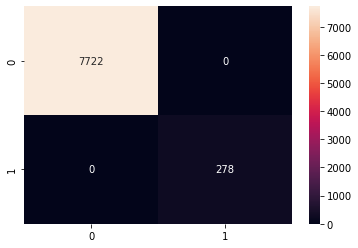

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7722
           1       1.00      1.00      1.00       278

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [14]:
from sklearn.metrics import confusion_matrix, classification_report

forest_pred = forest_clf.predict(X_train)

cm = confusion_matrix(y_train, forest_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_train, forest_pred))

**Imprimiendo resultados de la clasificación en el test (RandomForest)**

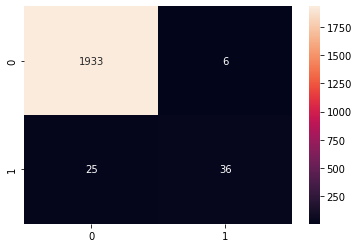

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.59      0.70        61

    accuracy                           0.98      2000
   macro avg       0.92      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000



In [15]:
forest_y_pred = forest_clf.predict(X_test)

cm = confusion_matrix(y_test, forest_y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test, forest_y_pred))

**Implementando modelo SVMClassifier**

In [16]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

**Imprimiendo Accuracy en el train con el modelo SVC**

In [17]:
svc_predict = svc.predict(X_train_scaled)
print(classification_report(y_train, svc_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7722
           1       0.95      0.29      0.44       278

    accuracy                           0.97      8000
   macro avg       0.96      0.64      0.71      8000
weighted avg       0.97      0.97      0.97      8000



**Imprimiendo Accuracy en el test con el modelo SVC**

In [18]:
svc_y_predict = svc.predict(X_test_scaled)
print(classification_report(y_test, svc_y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.86      0.30      0.44        61

    accuracy                           0.98      2000
   macro avg       0.92      0.65      0.71      2000
weighted avg       0.97      0.98      0.97      2000



**Cross Validation en el train SVC**

In [19]:
scores = cross_val_score(svc, X_train, y_train, scoring="accuracy", cv=5)
svc_scores = np.sqrt(scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Accuracy:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(svc_scores)

Scores: [0.9826622  0.98298016 0.98234414 0.98234414 0.98234414]
Accuracy: 0.9825349537153654
Standard deviation: 0.00025441608561335325


**Cross Validation en el test SVC**

In [20]:
scores = cross_val_score(svc, X_test, y_test, scoring="accuracy", cv=5)
svc_scores = np.sqrt(scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Accuracy:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(svc_scores)

Scores: [0.98488578 0.98488578 0.98488578 0.98488578 0.98361578]
Accuracy: 0.9846317798727483
Standard deviation: 0.0005080006137241355


**Imprimiendo resultados de la clasificación en el train (SVC)**

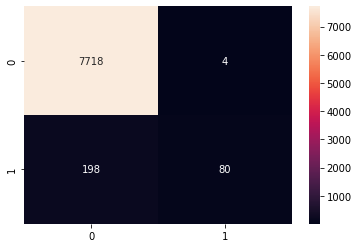

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7722
           1       0.95      0.29      0.44       278

    accuracy                           0.97      8000
   macro avg       0.96      0.64      0.71      8000
weighted avg       0.97      0.97      0.97      8000



In [21]:
svc_pred = svc.predict(X_train_scaled)

cm = confusion_matrix(y_train, svc_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_train, svc_pred))

**Imprimiendo resultados de la clasificación en el test (SVC)**

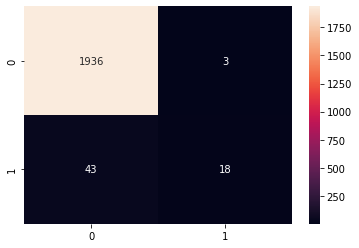

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.86      0.30      0.44        61

    accuracy                           0.98      2000
   macro avg       0.92      0.65      0.71      2000
weighted avg       0.97      0.98      0.97      2000



In [22]:
svc_y_pred = svc.predict(X_test_scaled)

cm = confusion_matrix(y_test, svc_y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test, svc_y_pred))

**GridSearch RandomForestClassifier**

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [3, 10, 20], 'min_samples_leaf': [0.05, 0.1], 
        'max_features': ['sqrt', 'log2'], 'ccp_alpha': [0, 0.01], 'n_jobs': [1, 2, 3]}
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'ccp_alpha': [0, 0.01], 'max_depth': [3, 10, 20],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_leaf': [0.05, 0.1],
                          'n_jobs': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy')

**Grid Search mejores hiperparametros (RandomForest)**

In [24]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0, max_depth=3, max_features='sqrt',
                       min_samples_leaf=0.05, n_jobs=1)

**Implementando modelo con los mejores hiperparametros (RandomForest)**

In [25]:
forest_clf = RandomForestClassifier(max_depth=3, max_features='sqrt', 
                                        n_jobs=1, min_samples_leaf=0.05)
forest_clf = forest_clf.fit(X_train, y_train.ravel())

**Cross Validation con Hiperparametros en el train (RandomForest)**

In [26]:
scores = cross_val_score(forest_clf, X_train, y_train, scoring="accuracy", cv=5)
rf_scores = np.sqrt(scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Accuracy:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_scores)

Scores: [0.9826622  0.9826622  0.98234414 0.98234414 0.98234414]
Accuracy: 0.9824713612723259
Standard deviation: 0.00015581945579779615


**Cross Validation con Hiperparametros en el test (RandomForest)**

In [27]:
scores = cross_val_score(forest_clf, X_test, y_test, scoring="accuracy", cv=5)
rf_scores = np.sqrt(scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Accuracy:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_scores)

Scores: [0.98488578 0.98488578 0.98488578 0.98488578 0.98361578]
Accuracy: 0.9846317798727483
Standard deviation: 0.0005080006137241355


**Imprimiendo Accuracy en el train con GridSearch (RandomForest)**

In [28]:
forest_predict = forest_clf.predict(X_train)
print(classification_report(y_train, forest_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7722
           1       0.00      0.00      0.00       278

    accuracy                           0.97      8000
   macro avg       0.48      0.50      0.49      8000
weighted avg       0.93      0.97      0.95      8000



**Imprimiendo Accuracy en el test con GridSearch (RandomForest)**

In [29]:
forest_y_predict = forest_clf.predict(X_test)
print(classification_report(y_test, forest_y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



**Imprimiendo resultados de la clasificación en el train con hiperparametros (RandomForest)**

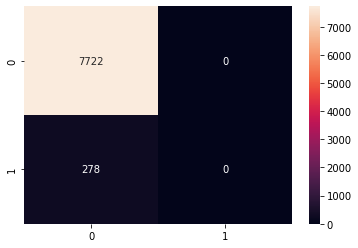

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7722
           1       0.00      0.00      0.00       278

    accuracy                           0.97      8000
   macro avg       0.48      0.50      0.49      8000
weighted avg       0.93      0.97      0.95      8000



In [30]:
forest_pred = forest_clf.predict(X_train)

cm = confusion_matrix(y_train, forest_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_train, forest_pred))

**Imprimiendo resultados de la clasificación en el test con hiperparametros (RandomForest)**

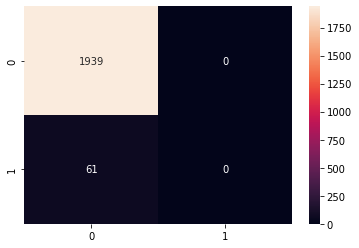

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



In [31]:
forest_y_pred = forest_clf.predict(X_test)

cm = confusion_matrix(y_test, forest_y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test, forest_y_pred))

**GridSearch SVMClassifier**

In [32]:
param_grid = [
    {'C': [1, 10], 'gamma': [0.001, 0.01], 'kernel': ['poly', 'linear']},
    {'C': [1, 10, 20], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}   
  ]

grid_search = GridSearchCV(svc, param_grid, cv=5,
                           scoring="accuracy", 
                           refit=True)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10], 'gamma': [0.001, 0.01],
                          'kernel': ['poly', 'linear']},
                         {'C': [1, 10, 20], 'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['poly', 'linear', 'rbf', 'sigmoid']}],
             scoring='accuracy')

**Grid Search Best Hyperparameters (SVC)**

In [33]:
grid_search.best_estimator_

SVC(C=20, gamma=0.1)

**Implementando modelo con los mejores hiperparametros (SVC)**

In [34]:
svc = SVC(C=20, gamma=0.1)
svc.fit(X_train_scaled, y_train)

SVC(C=20, gamma=0.1)

**Cross Validation con Hiperparametros en el train (SVC)**

In [35]:
scores = cross_val_score(svc, X_train, y_train, scoring="accuracy", cv=5)
svc_scores = np.sqrt(scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Accuracy:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(svc_scores)

Scores: [0.98202597 0.98202597 0.98202597 0.98202597 0.98202597]
Accuracy: 0.9820259670701178
Standard deviation: 0.0


**Cross Validation con Hiperparametros en el test (SVC)**

In [36]:
scores = cross_val_score(svc, X_test, y_test, scoring="accuracy", cv=5)
svc_scores = np.sqrt(scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Accuracy:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(svc_scores)

Scores: [0.98488578 0.98488578 0.98488578 0.98488578 0.98361578]
Accuracy: 0.9846317798727483
Standard deviation: 0.0005080006137241355


**Imprimiendo Accuracy en el train con GridSearch (SVC)**

In [37]:
svc_predict = svc.predict(X_train_scaled)
print(classification_report(y_train, svc_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7722
           1       0.94      0.62      0.75       278

    accuracy                           0.99      8000
   macro avg       0.97      0.81      0.87      8000
weighted avg       0.98      0.99      0.98      8000



**Imprimiendo Accuracy en el test con GridSearch (SVC)**

In [38]:
svc_y_predict = svc.predict(X_test_scaled)
print(classification_report(y_test, svc_y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.74      0.52      0.62        61

    accuracy                           0.98      2000
   macro avg       0.86      0.76      0.80      2000
weighted avg       0.98      0.98      0.98      2000



**Imprimiendo resultados de la clasificación en el train con hiperparametros (SVC)**

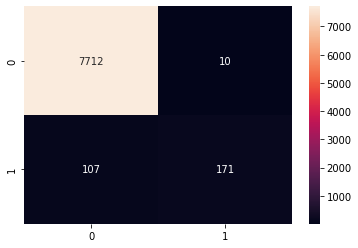

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7722
           1       0.94      0.62      0.75       278

    accuracy                           0.99      8000
   macro avg       0.97      0.81      0.87      8000
weighted avg       0.98      0.99      0.98      8000



In [39]:
svc_pred = svc.predict(X_train_scaled)

cm = confusion_matrix(y_train, svc_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_train, svc_pred))

**Imprimiendo resultados de la clasificación en el test con hiperparametros (SVC)**

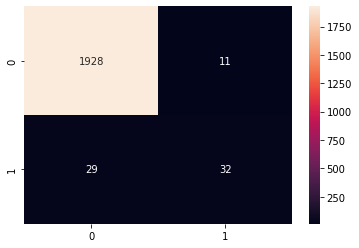

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.74      0.52      0.62        61

    accuracy                           0.98      2000
   macro avg       0.86      0.76      0.80      2000
weighted avg       0.98      0.98      0.98      2000



In [40]:
svc_y_pred = svc.predict(X_test_scaled)

cm = confusion_matrix(y_test, svc_y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test, svc_y_pred))

**Re-dimensionando el set de entenamiento y de prueba para adaptarlo a la red LSTM**

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

**Implementando y entrenando la red LSTM**

In [42]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.core import Dense, Activation, Dropout
  
model = Sequential()
model.add(LSTM(25, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=10, verbose=1)

Epoch 1/30
800/800 [==============================] - 4s 3ms/step - loss: 0.5313 - accuracy: 0.9479
Epoch 2/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5120 - accuracy: 0.9626
Epoch 3/30
800/800 [==============================] - 3s 3ms/step - loss: 0.4962 - accuracy: 0.9606
Epoch 4/30
800/800 [==============================] - 2s 3ms/step - loss: 0.4924 - accuracy: 0.9626
Epoch 5/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5001 - accuracy: 0.9605
Epoch 6/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5325 - accuracy: 0.9636
Epoch 7/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5278 - accuracy: 0.9647
Epoch 8/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5173 - accuracy: 0.9643
Epoch 9/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5323 - accuracy: 0.9650
Epoch 10/30
800/800 [==============================] - 2s 3ms/step - loss: 0.5365 - accuracy: 0.9647

In [43]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10,validation_split=0.1)

Epoch 1/30
720/720 [==============================] - 3s 4ms/step - loss: 0.5206 - accuracy: 0.9663 - val_loss: 0.6748 - val_accuracy: 0.9563
Epoch 2/30
720/720 [==============================] - 2s 3ms/step - loss: 0.5206 - accuracy: 0.9663 - val_loss: 0.6748 - val_accuracy: 0.9563
Epoch 3/30
720/720 [==============================] - 2s 3ms/step - loss: 0.5206 - accuracy: 0.9663 - val_loss: 0.6748 - val_accuracy: 0.9563
Epoch 4/30
720/720 [==============================] - 2s 3ms/step - loss: 0.5206 - accuracy: 0.9663 - val_loss: 0.6748 - val_accuracy: 0.9563
Epoch 5/30
720/720 [==============================] - 2s 3ms/step - loss: 0.5206 - accuracy: 0.9663 - val_loss: 0.6748 - val_accuracy: 0.9563
Epoch 6/30
720/720 [==============================] - 2s 3ms/step - loss: 0.5206 - accuracy: 0.9663 - val_loss: 0.6748 - val_accuracy: 0.9563
Epoch 7/30
720/720 [==============================] - 2s 3ms/step - loss: 0.5206 - accuracy: 0.9663 - val_loss: 0.6748 - val_accuracy: 0.9563
Epoch 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (10, 25)                  3200      
                                                                 
 dense (Dense)               (10, 10)                  260       
                                                                 
 dropout (Dropout)           (10, 10)                  0         
                                                                 
 dense_1 (Dense)             (10, 1)                   11        
                                                                 
Total params: 3,471
Trainable params: 3,471
Non-trainable params: 0
_________________________________________________________________


**Accuracy en train**

In [50]:
acc = model.evaluate(X_train, y_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

250/250 [==============================] - 1s 2ms/step - loss: 0.5360 - accuracy: 0.9653
Train set
  Loss: 0.536
  Accuracy: 0.965


**Accuracy en test**

In [45]:
acc = model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

63/63 [==============================] - 1s 2ms/step - loss: 0.4705 - accuracy: 0.9695
Test set
  Loss: 0.470
  Accuracy: 0.970


**Predicciones en el train de la red LSTM**

In [46]:
y_predict = (model.predict(X_train) > 0.5).astype("int32")
print(y_predict.sum())
print(y_train.sum())

0
278


**Predicciones en el test de la red LSTM**

In [47]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(y_pred.sum())
print(y_test.sum())

0
61


**Imprimiendo resultados de la clasificación en el train de la red LSTM**

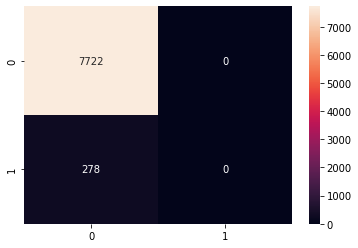

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7722
           1       0.00      0.00      0.00       278

    accuracy                           0.97      8000
   macro avg       0.48      0.50      0.49      8000
weighted avg       0.93      0.97      0.95      8000



In [48]:
cm = confusion_matrix(y_train, y_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_train, y_predict))

**Imprimiendo resultados de la clasificación en el test de la red LSTM**

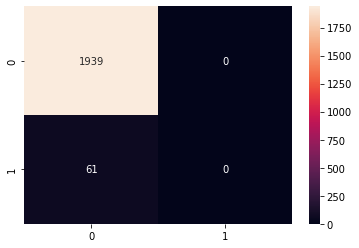

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
print(classification_report(y_test, y_pred))

**Conclusión**

Todos los modelos arrojaron buenos resultados en el test por lo que se puede descartar que se hayan sobre entrenado los modelos, en el caso del Random Forest y la red LSTM no se normalizaron los datos debido a que si se normalizaban arrojaban malos resultados, esto es debido a que como el data set es muy pequeño por lo que la dispersión de los datos no es mucha como para que los modelos se sobre entrenen y causen malas clasificaciones en el set de pruebas. Por parte de la red LSTM, se probaron varias épocas y tamaños del batch para el entrenamiento debido a que el error se hacia muy pequeño conforme aumentaban las épocas y el tamaño del batch por lo que llegaba un momento en el que el error se estancaba lo cual significaba que la red ya no podía aprender más, es por esto que con 30 épocas fueron suficientes para entrenar el modelo con un tamaño del batch de 10.  